# Image classification of number using tensorflow and MNIST dataset

**MNIST database**

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

**Tensorflow**

TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

**Neural Network**

Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another

**<center>Importing Libraries</center>**

In [1]:
import tensorflow as tf

**<center>Importing Datasets</center>**

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**<center>Dimension of the Array</center>**

In [3]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


**<center>Importing Module & Plotting First Image of the Training Dataset</center>**

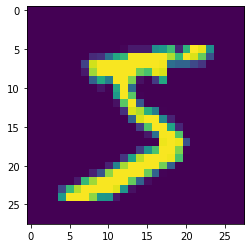

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])
plt.show()

**<center>Checking With the Target Variable</center>**

In [5]:
y_train[0]

5

**<center>Encoding Classes</center>**

In [6]:
from tensorflow.keras.utils import to_categorical
y_train_enc=to_categorical(y_train)
y_test_enc=to_categorical(y_test)

**<center>Checking Dimension of both the target variable</center>**

In [7]:
print("y_train shape: ",y_train_enc.shape)
print("y_test shape: ",y_test_enc.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [8]:
y_train_enc[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**<center>Reshape Training and the Testing Datasets</center>**

In [9]:
import numpy as np
x_train_rs=np.reshape(x_train,(60000,784))
x_test_rs=np.reshape(x_test,(10000,784))
print("x_train reshaped: ",x_train_rs.shape)
print("x_test reshaped: ",x_test_rs.shape)

x_train reshaped:  (60000, 784)
x_test reshaped:  (10000, 784)


**<center>Standardization of the array</center>**

In [10]:
x_mean=np.mean(x_train_rs)
x_mean2=np.mean(x_test_rs)
x_std=np.std(x_train_rs)
x_std2=np.std(x_test_rs)
x_train_std=(x_train_rs-x_mean)/x_std
x_test_std=(x_test_rs-x_mean2)/x_std2

**<center>Standardization view of Training and Testing Datasets</center>** 

In [11]:
print("Standardized training set: ",set(x_train_std[0]))
print("Standardized testing set: ",set(x_test_std[0]))

Standardized training set:  {-0.3858901621553201, 1.3069219669849146, 1.1796428595307615, 1.8033104860561113, 1.6887592893473735, 2.821543345689335, 2.7197200597260127, 1.192370770276177, 1.53602436040239, 1.7396709323290347, 2.7960875241985046, 2.6560805059989363, 2.18514780841857, 2.4906176663085375, -0.10587612575618353, 2.681536327489767, 0.03413089244338476, -0.19497150097409063, 0.7723497156774721, 0.9378125553678709, -0.2458831439557518, 2.210603629909401, 1.9051337720194337, 1.2687382347486686, 1.7651267538198654, -0.424073894391566, 0.41596821480584373, -0.2840668761919977, 0.27596119660627544, 1.4596568959298981, 1.2941940562394993, 2.096052433200663, 1.9560454150010949, 2.7579037919622587, 1.4851127174207288, -0.09314821501076823, 2.783359613453089, 2.286971094381893, 2.4524339340722916, 1.3451056992211605, -0.042236572029107036, 2.643352595253521, -0.13133194724701414, 0.7596218049320568, 0.28868910735169073, 0.6068868759870732, 0.6196147867324885, -0.4113459836461507, 0.46

**<center>Creating Neural Network</center>**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(532, activation = 'relu', input_shape = (784,)),
    Dense(532, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

**<center>Compiling Neural Network</center>**

In [13]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 532)               417620    
                                                                 
 dense_1 (Dense)             (None, 532)               283556    
                                                                 
 dense_2 (Dense)             (None, 10)                5330      
                                                                 
Total params: 706,506
Trainable params: 706,506
Non-trainable params: 0
_________________________________________________________________


**<center>Fitting Model with a Training Dataset and Target Variable</center>**

In [14]:
model.fit(
    x_train_std,
    y_train_enc,
    epochs = 5
)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3174 - accuracy: 0.9101
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9558
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1127 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0890 - accuracy: 0.9750
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0721 - accuracy: 0.9802


**<center>Accuracy of the model</center>**

In [15]:
loss1, accuracy1 = model.evaluate(x_test_std, y_test_enc)
loss2, accuracy2 = model.evaluate(x_train_std, y_train_enc)
print('test set accuracy: ', accuracy1 *100)
print('train set accuracy: ', accuracy2 * 100)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0585 - accuracy: 0.9842
test set accuracy:  97.39000201225281
train set accuracy:  98.42333197593689
